In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [187]:
random.seed(1)
runs = 200
steps = 1000
bandits = 10
eps = [.1]

In [188]:
q = np.zeros(bandits) # true values
qq = np.zeros(bandits) # keep the initial q's the same for everybody
qss= np.zeros([3,runs,bandits])
qs = np.zeros([3,runs])
results = np.zeros([3,runs,steps-1])
optimal = np.zeros([3,runs,steps-1])

In [189]:
qq[0] = np.random.normal(0,1)
for i in range(1, bandits):
    qq[i] = qq[0]

In [211]:
for l, epsilon in enumerate(eps):
    for k in range(runs):
        R = np.zeros([steps,bandits]) # actual rewards
        gained_reward = np.zeros(steps-1) # gained reward in each step
        A = np.zeros(steps) # selected actions
        opt = np.zeros(steps-1) # percentage of optimal choice
        Q = np.zeros(bandits) # value
        counts = np.zeros(bandits) # counts of numbers each bandit was selected
        q = qq
        for j in range(steps-1):
            if np.random.rand() < epsilon:
                A[j] = np.random.randint(bandits)
            else:
                index = np.where(Q == np.amax(Q))
                A[j] = random.choice(index[0])
            idx = A[j].astype(int)
            counts[idx] = counts[idx] + 1
            R[j,idx] = np.random.normal(q[idx],1)
            gained_reward[j] = R[j,idx]
            Q[idx] = Q[idx] + (1/counts[idx]) * (R[j,idx] - Q[idx])
            if idx == np.argmax(q): 
                opt[j] = 100
            for i in range(bandits):
                q[i] = q[i] + np.random.normal(0,.01)
        results[l,k,] = np.cumsum(gained_reward)/np.arange(1,steps)
        optimal[l,k,] = np.cumsum(opt)/np.arange(1,steps)
        qs[l,k,] = np.max(q)
        qss[l,k,] = q

In [197]:
for l, epsilon in enumerate(eps):
    for k in range(runs):
#         gained_reward = np.zeros(steps-1) # gained reward in each step
#         A = np.zeros(steps) # selected actions
#         opt = np.zeros(steps-1) # percentage of optimal choice
#         Q = np.zeros(bandits) # value
#         counts = np.zeros(bandits) # counts of numbers each bandit was selected
        q = qq
        for j in range(1000):
#             if np.random.rand() < epsilon:
#                 A[j] = np.random.randint(bandits)
#             else:
#                 index = np.where(Q == np.amax(Q))
#                 A[j] = random.choice(index[0])
#             idx = A[j].astype(int)
#             counts[idx] = counts[idx] + 1
#             gained_reward[j] = np.random.normal(q[idx],1)
# #             Q[idx] = Q[idx] + (1/counts[idx]) * (gained_reward[j] - Q[idx])
#             if idx == np.argmax(q): 
#                 opt[j] = 100
            for i in range(bandits):
                q[i] = q[i] + np.random.normal(0,.01)
#         results[l,k,] = np.cumsum(gained_reward)/np.arange(1,steps)
#         Qs[l,k,] = np.max(Q)
        qs[l,k,] = np.max(q)
        qss[l,k,] = q
#         optimal[l,k,] = np.cumsum(opt)/np.arange(1,steps)

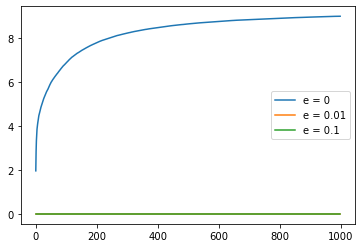

In [209]:
plt.plot(range(steps-1), np.mean(results[0],0), label = 'e = 0')
plt.plot(range(steps-1), np.mean(results[1],0), label = 'e = 0.01')
plt.plot(range(steps-1), np.mean(results[2],0), label = 'e = 0.1')
plt.legend()

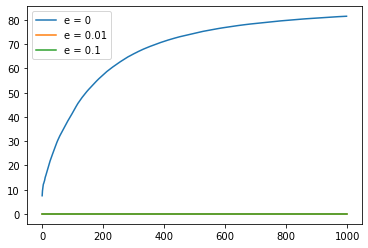

In [210]:
plt.plot(range(steps-1), np.mean(optimal[0],0), label = 'e = 0')
plt.plot(range(steps-1), np.mean(optimal[1],0), label = 'e = 0.01')
plt.plot(range(steps-1), np.mean(optimal[2],0), label = 'e = 0.1')
plt.legend()

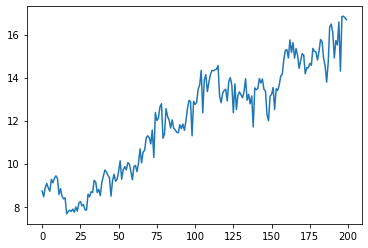

In [212]:
plt.plot(range(200),results[0,:,998])

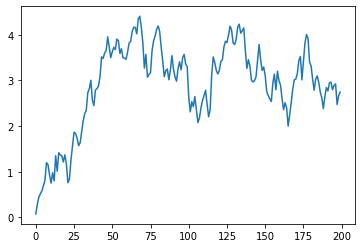

In [213]:
plt.plot(range(200),Qs[0,:])

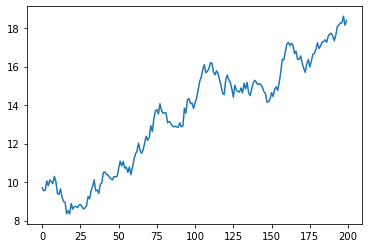

In [214]:
plt.plot(range(200),qs[0,:])

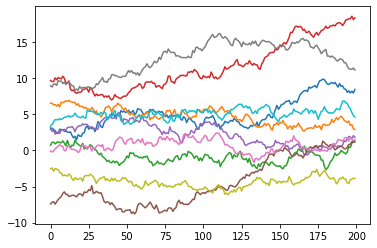

In [215]:
for i in range(bandits):
    plt.plot(range(200),qss[0,:,i])
